<a href="https://colab.research.google.com/github/NadiaCarvalho/LivroPython/blob/main/Beat_Remix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Para ter acesso aos ficheiros audio
!git clone https://github.com/NadiaCarvalho/LivroPython.git

fatal: destination path 'LivroPython' already exists and is not an empty directory.


Import Librosa (https://librosa.org)


In [2]:
import librosa
import librosa.display
import numpy

**Load** an audio file 

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


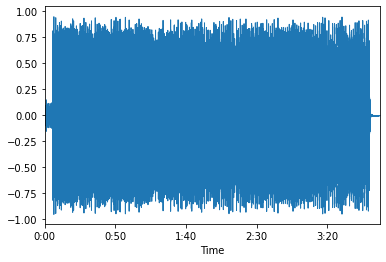

In [3]:
audio_file = './LivroPython/files/audio_groove.mp3'
y, sr = librosa.load(audio_file)
librosa.display.waveplot(y, sr)

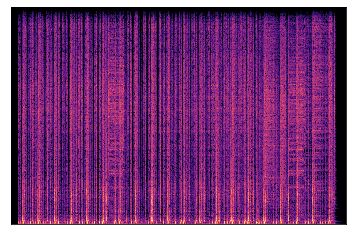

In [4]:
D = librosa.stft(y) # STFT de y
S_db = librosa.amplitude_to_db(numpy.abs(D), ref=numpy.max)
librosa.display.specshow(S_db)

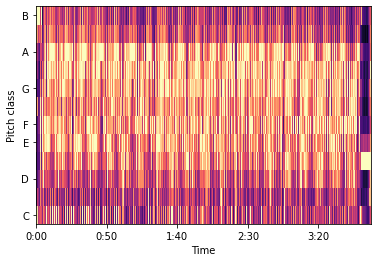

In [5]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')

Get beats from audio.

In [6]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
# print(beats)

Get the beat frames as time frames.

> Indented block


Then, add the first beat (at time 0).



In [7]:
beat_samples = librosa.frames_to_samples(beat_frames)
# print(beat_samples)

In [8]:
beat_samples = numpy.insert(beat_samples, 0, 0, axis=0)

Generate intervals from beats. An interval corresponds to the time space between two beats.

In [9]:
intervals = librosa.util.frame(beat_samples, frame_length=2, hop_length=1).T
# print(intervals)

Order the intervals to remix: Group all ones, all twos, all threes,...

In [10]:
# Group Intervals
grouped_intervals = {
    0: [], # all 1st beat intervals
    1: [], # all 2nd beat intervals
    2: [], # all 3rd beat intervals
    3: []  # all 4th beat intervals
}

# For each beat interval, divide its appearance number by 4
for i, inval in enumerate(intervals):
  grouped_intervals[i%4].append(inval)

And then, randomly choose a beat interval from each kind of interval, sequentially until you want to finish.

In [11]:
# Randomly get a beat of each for 8 bars of 4 beats
import random
new_intervals = []

for j in range(8):
  for k in range(4):
    new_intervals.append(random.choice(grouped_intervals[k]))
# print(new_intervals)

Remix the audio signal with the re-ordered time intervals.



In [12]:
y_out = librosa.effects.remix(y, new_intervals)

Play the generated audio file with the remixed 8 bars

In [13]:
import IPython.display as ipd
ipd.Audio(y_out, rate=sr)